# TME2: Prise en main de PIL et Matplotlib

> Consignes: le fichier **TME2_Sujet.ipynb** est à déposer sur le site Moodle de l'UE https://moodle-sciences.upmc.fr/moodle-2019/course/view.php?id=4248. Si vous êtes en binôme, renommez-le en **TME2_nom1_nom2.ipynb**.
`PIL` (https://pillow.readthedocs.io/en/stable/index.html) est le module qui nous permet de lire, manipuler et écrire des images avec un grand nombre de formats possible. `Matplotlib` permet d'afficher des courbes et des images, il est chargé par l'intermédiaire du meta-module `pylab`. Les deux modules sont importés par la série d'instructions Python suivante:

In [3]:
from PIL import Image
from pylab import *

## Exercice 1 : chargement d'image et visualisation
### 1.1 Voir une image
Écrire un code Python qui charge l'image `img/genies-math.jpg` et l'affiche à l'aide de la commande imshow(). Afficher le mode de cette image.

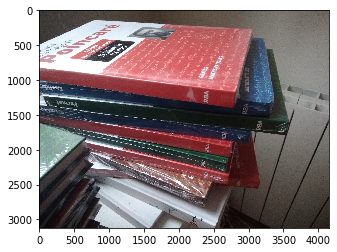

In [8]:
imshow (Image.open ( "img/genies-math.jpg" ))
show()

### 1.2 Conversion de mode
Convertir cette image en image à niveau de gris. Afficher simultanément les deux images couleurs et niveaux de gris,  l'une à droite, l'autre à gauche, sans les axes. Donner un titre à chaque image.

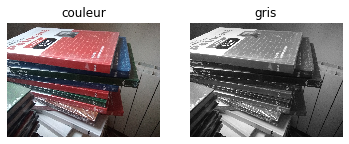

In [9]:
img=Image.open ( "img/genies-math.jpg" )
gris=img.convert( 'L')

subplot (1 ,2 ,1)
title ( "couleur")
axis('off')
imshow(img)
subplot (1 ,2 ,2)
title ( "gris")
imshow(gris, cmap="gray")
axis('off')
show()

### 1.3 Histogramme
Utiliser la méthode `histogram()` de la classe `Image` pour calculer l'histogramme de l'image en niveau de gris calculée à la question précédente. Afficher l'histogramme sous la forme d'un graphe de bar.

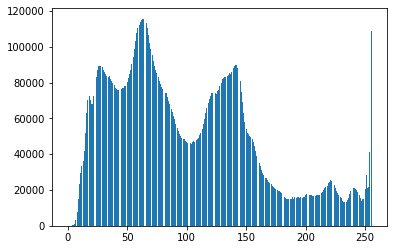

In [11]:
img=Image.open ( "img/genies-math.jpg" )
gris=img.convert( 'L')
his=gris.histogram()
bar ( range ( len ( his )) , his )
show()

### 1.4 Égalisation d'histogramme
Utiliser les fonctions `egalisation()` et `applique()` du TME1 pour créer une liste de nouvelle valeurs dont l'histogramme a été égaliser. Puis en faire une nouvelle image PIL. Afficher l'image avant, puis après égalisation. Afficher l'histogramme de l'image égalisée.

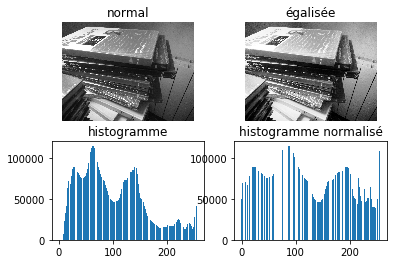

In [54]:
def applique(data,table):
    """ list[int]*list[int] -> list[int] """
    Image=[0]*len(data)
    for p in range(len(data)):
        Image[p]=table[data[p]]
    return Image


def egalisation(his):
    """ list[int] -> list[int] """
    Hc=[0]*len(his)
    Hc[0]=his[0]
    for p in range(1,len(his)):
        Hc[p]=Hc[p-1]+his[p]
    
    non_null = [i for i in range(len(his)) if his[i] != 0]
    tmin = non_null[0]
    tmax = non_null[-1]
    
    C=[0]*len(his)
    for k in range(len(his)):
        C[k]=int(Hc[k]*(tmax-tmin)/(Hc[-1]))
    return C

img=Image.open("img/genies-math.jpg")
gris=img.convert('L')

subplot (2 ,2 ,1)
title ( "normal")
axis('off')
imshow(gris,cmap='gray')

his=gris.histogram()
img_ega=applique(list(gris.getdata()),egalisation(his))
subplot (2 ,2 ,2)
title ( "égalisée")
axis('off')
new=Image.new('L',img.size)
new.putdata(img_ega)
imshow(new,cmap='gray')
subplot (2 ,2 ,3)
title ( "histogramme")
bar ( range ( len ( his )) , his )
his_new=new.histogram()
subplot (2 ,2 ,4)
title ( "histogramme normalisé")
bar ( range ( len ( his_new )) , his_new )
show()



### 1.5 Egalisation d'histogramme (suite)
La classe `ImageOps` du module `PIL` contient une méthode `equalize()` qui égalise l'histogramme d'une image. Utiliser cette méthode et comparer le résultat avec votre propre fonction d'égalisation (comparer aussi les deux histogrammes après égalisation).

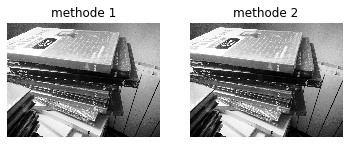

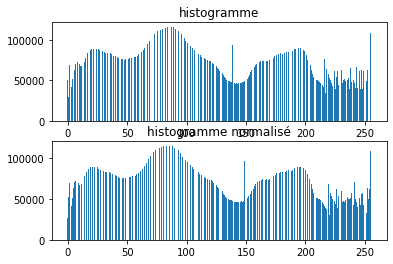

In [62]:
from PIL import ImageOps


subplot (1 ,2 ,1)
title ( "methode 1")
axis('off')
imshow(new,cmap='gray')

subplot (1 ,2 ,2)
title ( "methode 2")
axis('off')
new2=ImageOps.equalize(gris)
imshow(new2,cmap='gray')
show()

subplot (2 ,1 ,1)
title ( "histogramme")
bar ( range ( len ( his_new )) , his_new )
his_new2=new2.histogram()
subplot (2 ,1 ,2)
title ( "histogramme normalisé")
bar ( range ( len ( his_new2 )) , his_new2 )
show()

## Exercice 2 : parcours d'image et calcul de statistiques
### 2.1 Calcul des extrema de l'image par parcours
Écrire une fonction `extrema()` qui prend une image PIL, la parcours pixel par pixel, à l'aide de classe `PyAcess` (ou une des autres méthodes vues en cours) et retourne ses valeurs minimale et maximale.


In [67]:
def  extrema(data):
    L = list(data.getdata())
    vmin,vmax=L[0],L[0]
    for v in L[1:]:
        if v>vmax: vmax=v
        if v<vmin: vmin=v
    return vmin,vmax

### 2.2 Application et temps de calcul
Appliquer la fonction `extrema()` à l'image `img/genies-math.jpg`, convertie en niveau de gris. Comparer le temps d'exécution avec la méthode `getextrema()` de la classe Image. Pour comparer les temps d'exécution, on peut utiliser les deux fonctions `tic()` et `tac()`: la première démarre un chronomètre, la seconde affiche le temps écoulés depuis le dernier appel de l'un des deux fonctions. Quelle est la taille de cette image ? Comment expliquer ces différences de temps d'exécution ?

In [74]:
from time import process_time
mytime = 0
def tic():
    global mytime
    mytime = process_time()
def tac():
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

img=Image.open ( "img/genies-math.jpg" )
gris=img.convert('L')
print("La taille de l'image est : ", gris.size)
tic()
print(extrema(gris))
tac()
tic()
print(gris.getextrema())
tac()


La taille de l'image est :  (4160, 3120)
(0, 255)
0.626383920999956
(0, 255)
0.011065906999988329


## Exercice 3: sur la couleur
### 3.1 séparation de canaux
Écrire un code Python qui charge l'image `mandrill.png`. Vérifier, à l'aide d'un test de son mode est bien `RGB`.
Séparer les 3 canaux à l'aide de la méthode `split()` de la classe `Image`. On peut aussi, de façon alternative, utiliser la méthode `getchannel()`

In [80]:
img=Image.open ( "img/mandrill.png" )
print(img.mode)
(R,G,B)=img.split()

RGB


### 3.2 échange de canaux
Créer une nouvelle image `RGB` dans laquelle on a échanger les canaux rouge et bleu. Afficher cette nouvelle image. On pourrat utilise la méthode `merge()` de la classe `Image`. Visualiser la nouvelle image. Essayer différente combinaison de canaux.

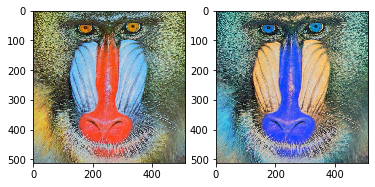

In [85]:

new=Image.new('RGB',img.size)
new=Image.merge('RGB',(B,G,R))
subplot(1,2,1)
imshow(img)
subplot(1,2,2)
imshow(new)
show()

### 3.3 Canaux séparés dans leur couleur
Écrire un code Python qui créée une image montrant le canal rouge en niveau de rouge. 
Faire de même pour les deux autres canaux.

## Exercice 4: avec image codée sur deux octets et ou virgule flottante
### 4.1 Image codée sur 2 octets
Charger l'image `img/CT-scan.png` et afficher les extremas de cette image. Cette image est issue d'une acquisition IRM, chaque valeur. Afficher l'image telle quelle et commenter. Quel opération faut-il faire pour voir tous les détails? Réaliser cette opération et afficher l'image transformée.

### 4.2 Image codée en virgule flottante

Même question avec l'image `img/sst.tif` qui est codée en virgule flottante et réprésente une image satellite de température de surface de l'Océan Atlantique. Afficher son mode.
